# Spoken Digit Classification

In [2]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn.svm import SVC
import IPython.display as ipd
import scipy as sp
%matplotlib inline
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics


## Import Recordings

In [3]:
# define the dictionary containing the 10 classes
class_train_files = {'zero': [], 'one': [], 'two': [], 'three': [], 'four': [], 'five': [], 'six': [], 'seven': [], 'eight': [], 'nine': []}

root = '../free-spoken-digit-dataset/recordings'
for f in os.listdir(root):
    for index, c in enumerate(class_train_files):
        if int(f[0]) == index:
            class_train_files[c].append(f)

# Listen to an audio file

In [4]:
audio, fs = librosa.load(os.path.join(root, class_train_files['eight'][2]), sr=None)
ipd.Audio(audio, rate=fs) # load the file

## Split dataset

In [5]:
df = pd.DataFrame(class_train_files)
# split the data into train and test set 
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
print(train.shape)
print(test.shape)

(240, 10)
(60, 10)


## Compute MFCC

In [6]:
# initialize dictionaries
dict_train_mfcc = {'zero': [], 'one': [], 'two': [], 'three': [], 'four': [], 'five': [], 'six': [], 'seven': [], 'eight': [], 'nine': []}
dict_test_mfcc = {'zero': [], 'one': [], 'two': [], 'three': [], 'four': [], 'five': [], 'six': [], 'seven': [], 'eight': [], 'nine': []}


# why 13? try different values. check warning
n_mfcc = 13

df_list = [train, test]

# for train and test
for index, data in enumerate(df_list):
    # for each class
    for c in data:
        # set up array for storing mfcc
        if index == 0:
            dict_train_mfcc[c] = np.zeros(((len(data[c])), n_mfcc))
        else:
            dict_test_mfcc[c] = np.zeros(((len(data[c])), n_mfcc))
        #temp_features = np.zeros(((len(data[c])), n_mfcc))
        # compute mfcc
        for index2, f in enumerate(data[c]):
            audio, fs = librosa.load(os.path.join(root, f), sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=fs, n_mfcc=n_mfcc, n_fft=1024, n_mels=40)
            #mfcc = preprocessing.scale(mfcc)
            #mfcc = compute_mfcc(audio, fs, n_mfcc)
            #temp_features[index2, :] = np.mean(mfcc, axis=1)
            # store results for current class and file
            if index == 0:
                dict_train_mfcc[c][index2, :] = np.mean(mfcc, axis=1)
            else:
                dict_test_mfcc[c][index2, :] = np.mean(mfcc, axis=1)
print('finished')

finished


In [7]:
# check one mfcc
dict_train_mfcc['one'][25]

array([-251.64013672,   41.5974617 ,   20.62729836,    3.92553353,
         -3.88712239,    7.95447493,   -9.73900223,    6.50859213,
          1.65492368,   -3.60694718,    0.68783718,    0.66499257,
         -1.46513641])

## Plot MFCC 

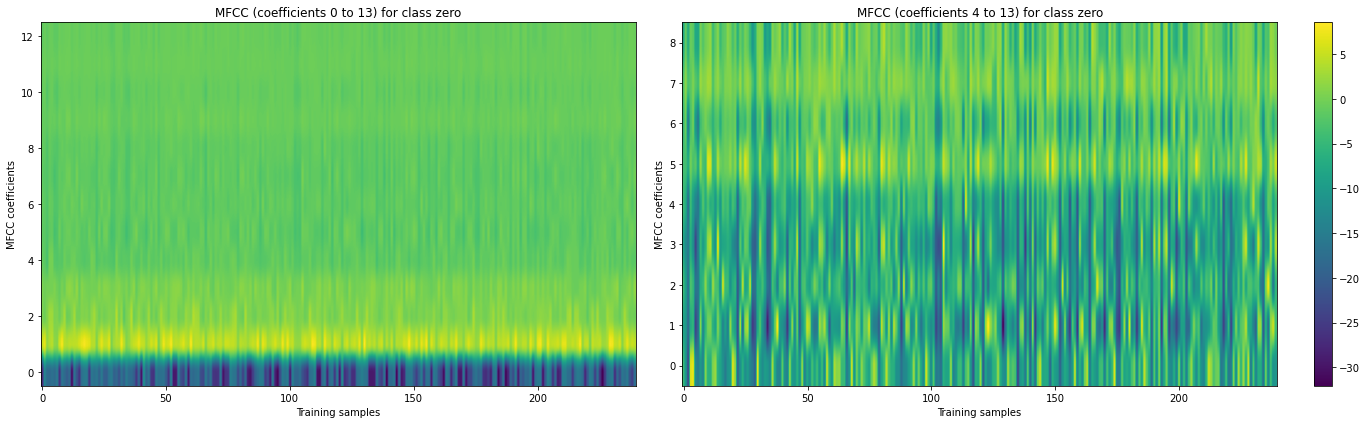

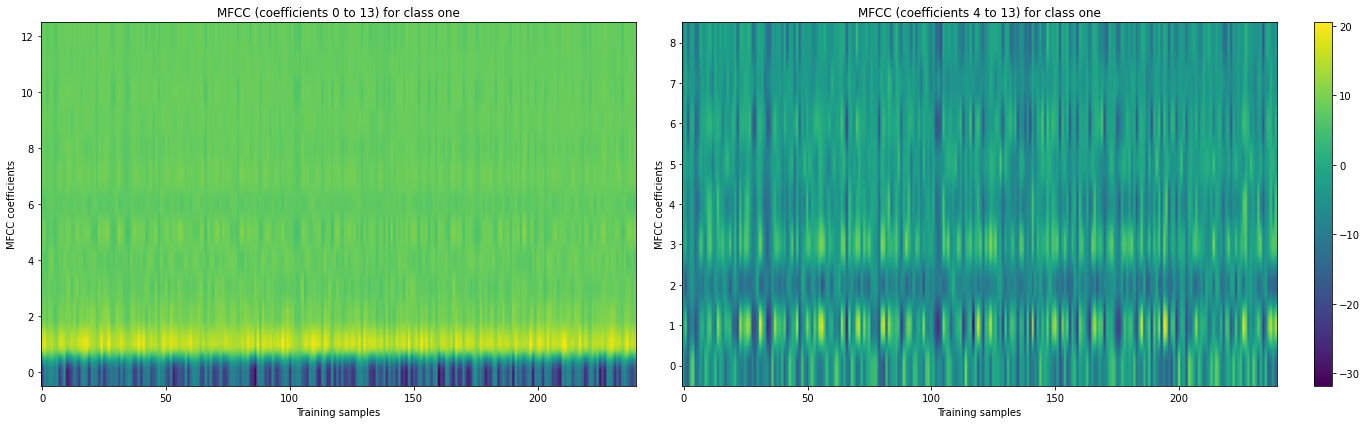

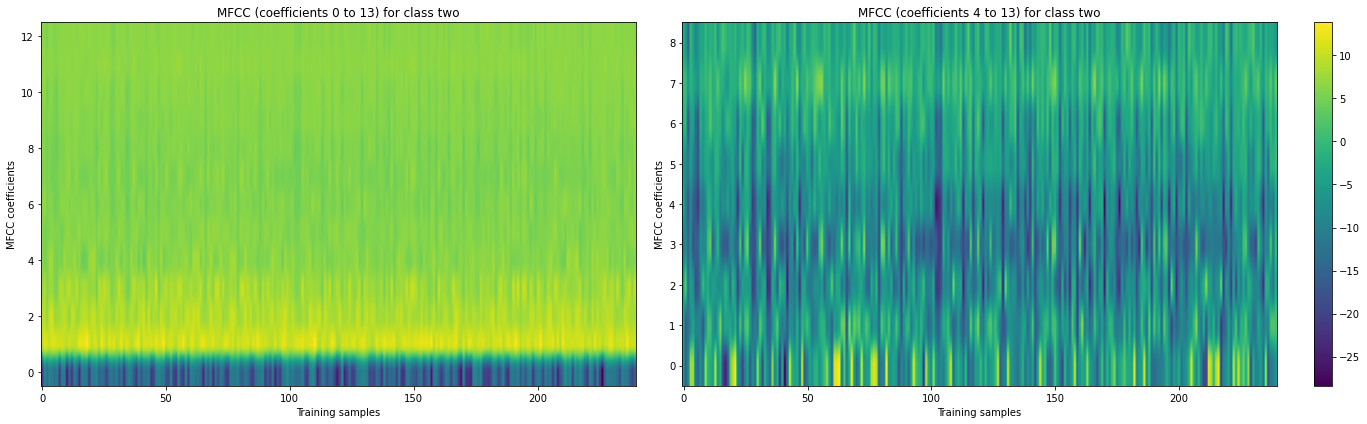

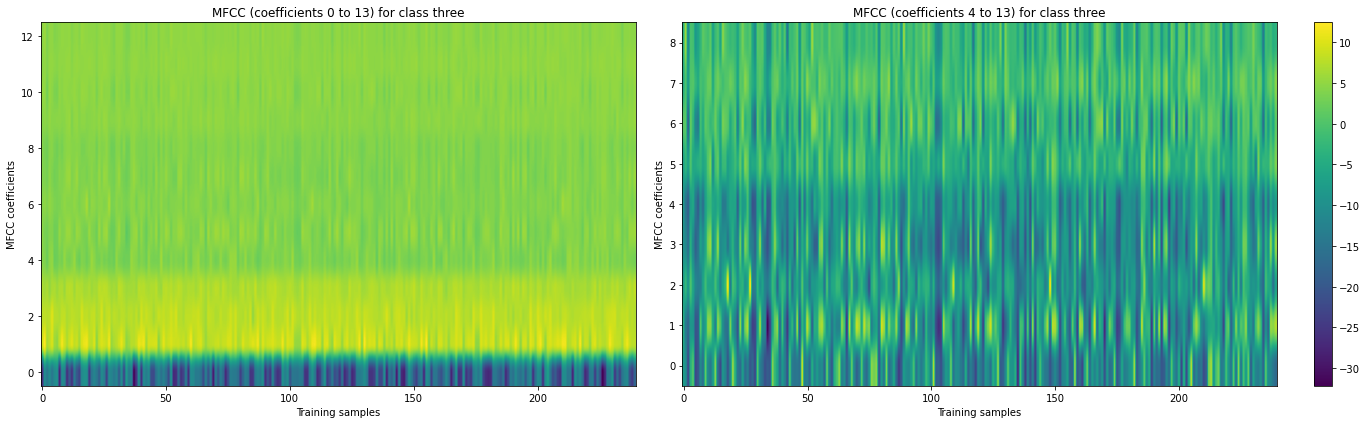

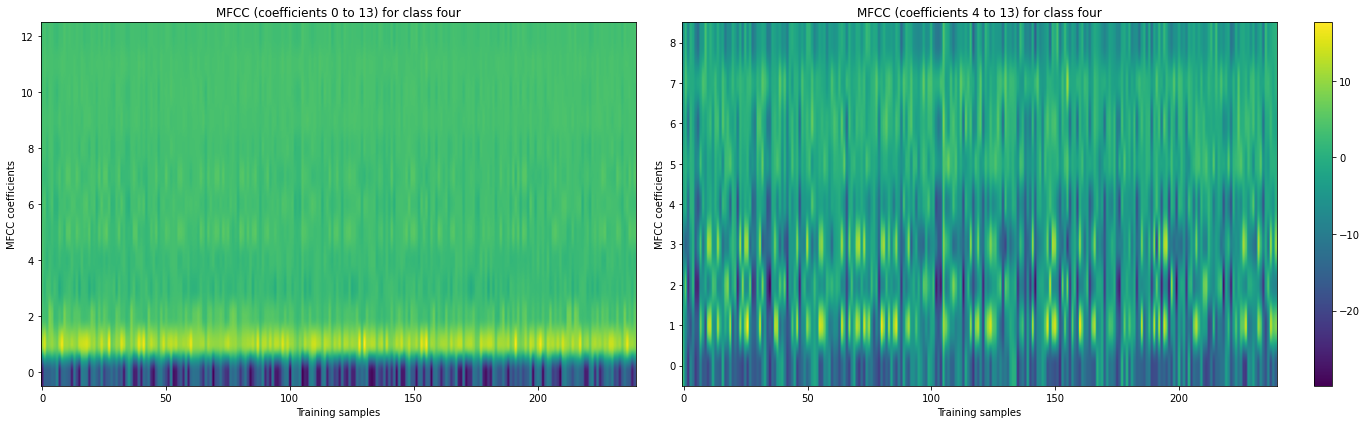

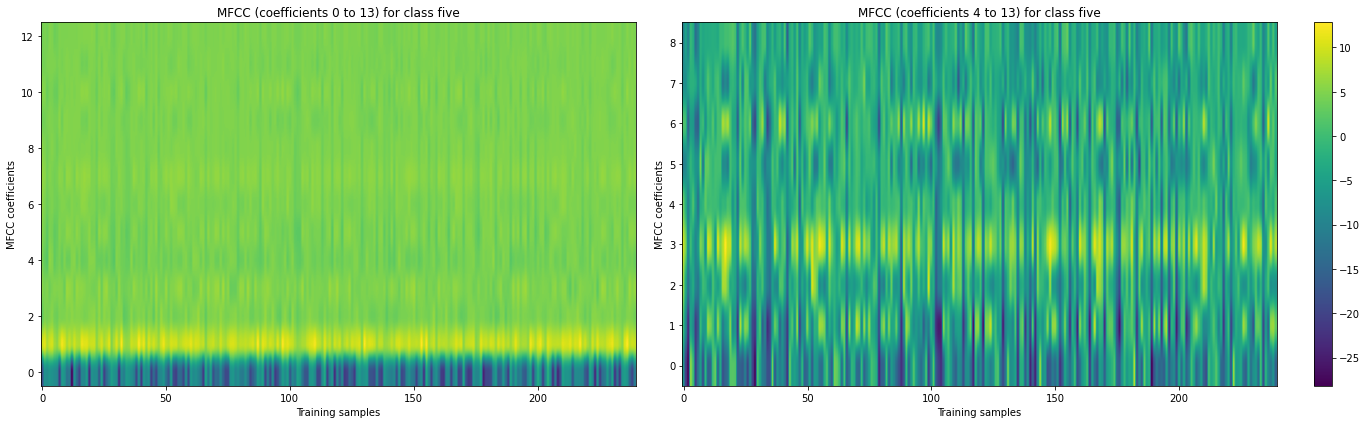

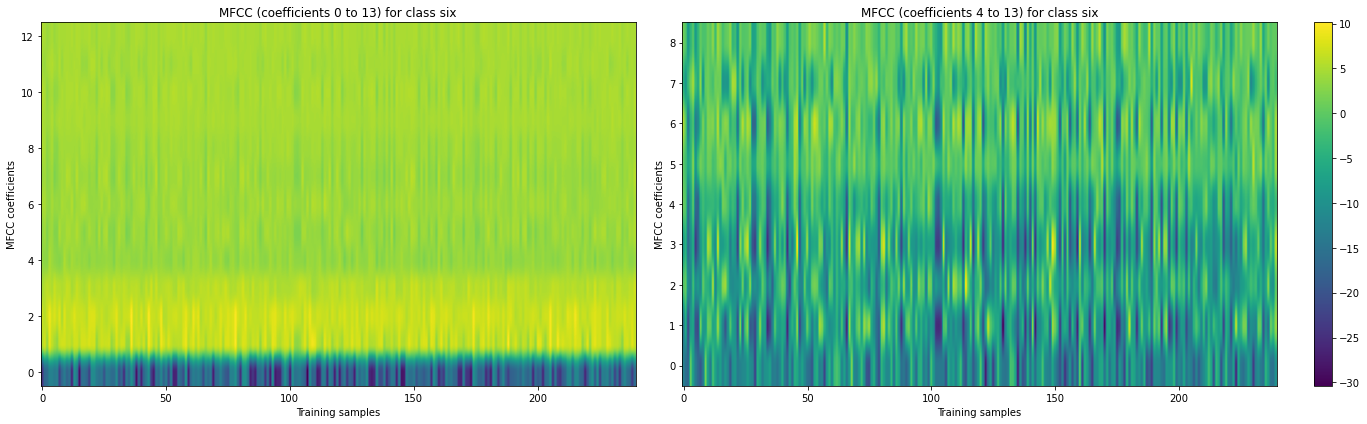

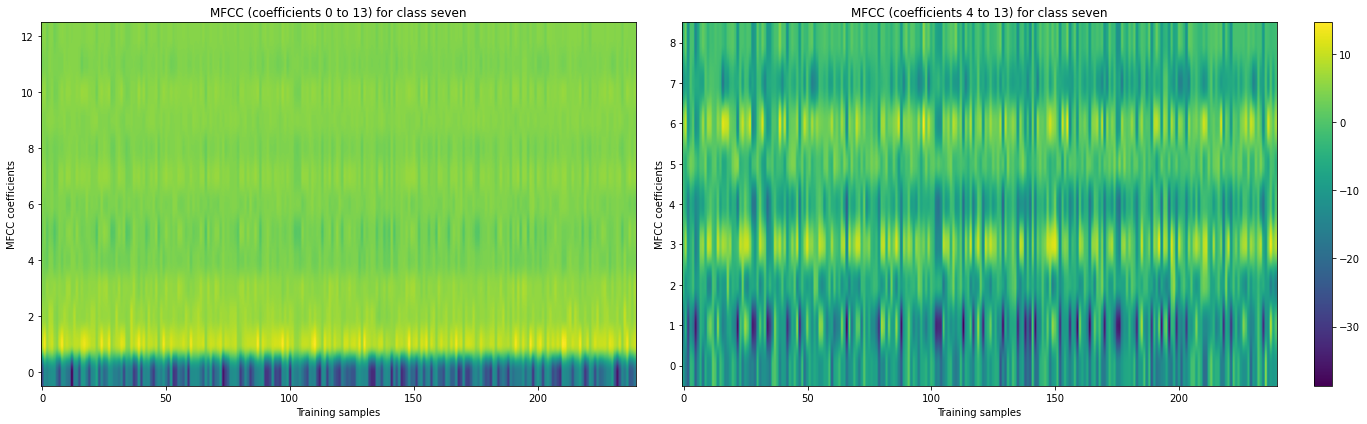

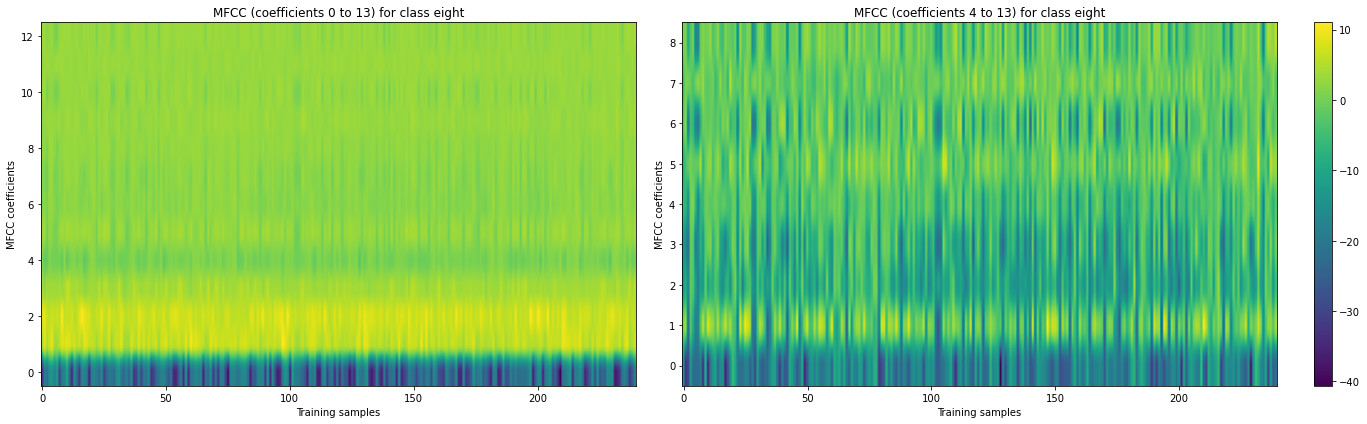

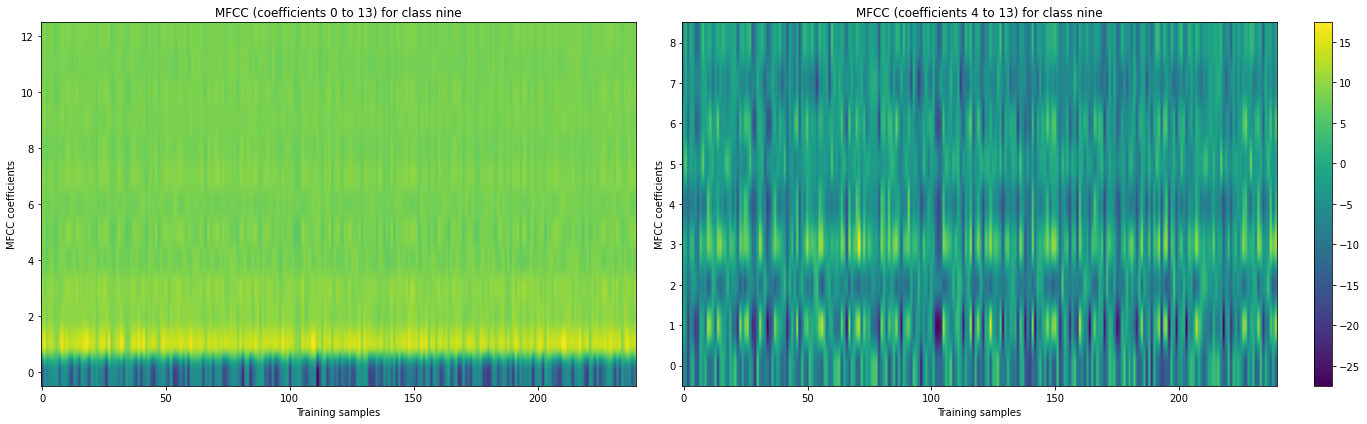

In [8]:
for c in dict_train_mfcc:
    mfcc = dict_train_mfcc[c].transpose()
    # Visualization
    fig = plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    plt.imshow(mfcc, origin='lower', aspect='auto')
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.title('MFCC (coefficients 0 to 13) for class {}'.format(c))
    plt.colorbar()
    plt.tight_layout()

    mfcc_upper = mfcc[4:]
    plt.subplot(1,2,2)
    plt.imshow(mfcc_upper, origin='lower', aspect='auto')
    plt.title('MFCC (coefficients 4 to 13) for class {}'.format(c))
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.tight_layout()

## SVM multiclass

In [9]:
X_train = np.concatenate((dict_train_mfcc['zero'], dict_train_mfcc['one'], dict_train_mfcc['two'], dict_train_mfcc['three'], dict_train_mfcc['four'], dict_train_mfcc['five'], dict_train_mfcc['six'], dict_train_mfcc['seven'], dict_train_mfcc['eight'], dict_train_mfcc['nine']), axis=0)
X_test = np.concatenate((dict_test_mfcc['zero'], dict_test_mfcc['one'], dict_test_mfcc['two'], dict_test_mfcc['three'], dict_test_mfcc['four'], dict_test_mfcc['five'], dict_test_mfcc['six'], dict_test_mfcc['seven'], dict_test_mfcc['eight'], dict_test_mfcc['nine']), axis=0) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_normalized = (X_train - feat_min) / (feat_max - feat_min)
#X_test_normalized = (X_test - feat_min) / (feat_max - feat_min)

Y_train = np.concatenate((np.zeros(dict_train_mfcc['zero'].shape[0]), np.ones(dict_train_mfcc['one'].shape[0]), np.ones(dict_train_mfcc['two'].shape[0])*2, np.ones(dict_train_mfcc['three'].shape[0])*3, np.ones(dict_train_mfcc['four'].shape[0])*4, np.ones(dict_train_mfcc['five'].shape[0])*5, np.ones(dict_train_mfcc['six'].shape[0])*6, np.ones(dict_train_mfcc['seven'].shape[0])*7, np.ones(dict_train_mfcc['eight'].shape[0])*8, np.ones(dict_train_mfcc['nine'].shape[0])*9), axis=0)
Y_test = np.concatenate((np.zeros(dict_test_mfcc['zero'].shape[0]), np.ones(dict_test_mfcc['one'].shape[0]), np.ones(dict_test_mfcc['two'].shape[0])*2, np.ones(dict_test_mfcc['three'].shape[0])*3, np.ones(dict_test_mfcc['four'].shape[0])*4, np.ones(dict_test_mfcc['five'].shape[0])*5, np.ones(dict_test_mfcc['six'].shape[0])*6, np.ones(dict_test_mfcc['seven'].shape[0])*7, np.ones(dict_test_mfcc['eight'].shape[0])*8, np.ones(dict_test_mfcc['nine'].shape[0])*9), axis=0)

In [10]:
SVM_parameters={
    'C': 2,
    'kernel': 'rbf',
    'random_state': 13,
}

clf = svm.SVC(**SVM_parameters)
clf.fit(X_train_scaled, Y_train)


SVC(C=2, random_state=13)

# SVM Confusion Matrix

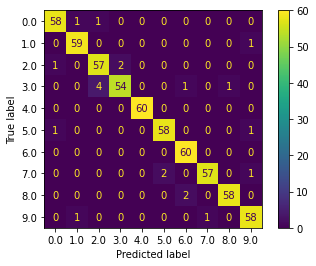

In [11]:
plot_confusion_matrix(clf, X_test_scaled, Y_test)
plt.show()

# SVM Precision, Recall, Accuracy, F1 score

In [12]:
predicted_test_labels = clf.predict(X_test_scaled)

In [13]:
N = Y_test.shape[0]
accuracy = (Y_test == predicted_test_labels).sum() / N
TP = ((predicted_test_labels == 1) & (Y_test == 1)).sum()
FP = ((predicted_test_labels == 1) & (Y_test == 0)).sum()
FN = ((predicted_test_labels == 0) & (Y_test == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
F1_score = 2 * precision * recall / (precision + recall)
print("Results: \n accuracy = {} \n precision = {} \n recall = {} \n F1 score = {}".format(
        accuracy, precision, recall, F1_score))

Results: 
 accuracy = 0.965 
 precision = 0.9833333333333333 
 recall = 1.0 
 F1 score = 0.9915966386554621


In [14]:
accuracy = metrics.accuracy_score(Y_test, predicted_test_labels, normalize=True)
precision = metrics.precision_score(Y_test, predicted_test_labels, average='weighted')
recall = metrics.recall_score(Y_test, predicted_test_labels, average='weighted')
F1_score = metrics.f1_score(Y_test, predicted_test_labels, average='weighted')
print("Results: \n accuracy = {} \n precision = {} \n recall = {} \n F1 score = {}".format(
        accuracy, precision, recall, F1_score))

# vengono diversi da quelli a mano, perché?

Results: 
 accuracy = 0.965 
 precision = 0.9653197093742206 
 recall = 0.965 
 F1 score = 0.9649179710100014


## Multi-Layer Perceptron

In [15]:
## from sklearn.neural_network import MLPClassifier

# here I tried the best possible parameters
clf = MLPClassifier(activation='logistic', solver='lbfgs',
                    alpha=1e-5, hidden_layer_sizes=(90), random_state=21)
clf.fit(X_train_scaled, Y_train)

NameError: name 'MLPClassifier' is not defined

## MLP Confusion matrix and metrics

In [ ]:
plot_confusion_matrix(clf, X_test_scaled, Y_test)
plt.show()

predicted_test_labels = clf.predict(X_test_scaled)

accuracy = metrics.accuracy_score(Y_test, predicted_test_labels, normalize=True)
precision = metrics.precision_score(Y_test, predicted_test_labels, average='weighted')
recall = metrics.recall_score(Y_test, predicted_test_labels, average='weighted')
F1_score = metrics.f1_score(Y_test, predicted_test_labels, average='weighted')
print("Results: \n accuracy = {} \n precision = {} \n recall = {} \n F1 score = {}".format(
        accuracy, precision, recall, F1_score))

# GMM

In [16]:
n_components = 3
gmm=np.empty(10,object) #define gmmlike an empty array with shape =10 and type: object

In [17]:
#define the with all the coeffifients of all the classes 
dict_train_mfcc_all = ([dict_train_mfcc['zero'], dict_train_mfcc['one'],dict_train_mfcc['two'],dict_train_mfcc['three'],
                                    dict_train_mfcc['four'],dict_train_mfcc['five'], dict_train_mfcc['six'], dict_train_mfcc['seven'],
                                     dict_train_mfcc['eight'], dict_train_mfcc['nine'] ])
dict_test_mfcc_all= np.concatenate((dict_test_mfcc['zero'],dict_test_mfcc['one'],dict_test_mfcc['two'],
                                   dict_test_mfcc['three'],dict_test_mfcc['four'],dict_test_mfcc['five'],
                                   dict_test_mfcc['six'],dict_test_mfcc['seven'],dict_test_mfcc['eight'],dict_test_mfcc['nine']),axis=0)

In [18]:
#define gmm for each class
for i in range(10):
    gmm[i]= BayesianGaussianMixture(n_components=n_components, random_state=2)
    gmm[i].fit(dict_train_mfcc_all[i])

In [19]:
mixt_pdf_0 = []
mixt_pdf_1 = []
mixt_pdf_2 = []
mixt_pdf_3 = []
mixt_pdf_4 = []
mixt_pdf_5 = []
mixt_pdf_6 = []
mixt_pdf_7 = []
mixt_pdf_8 = []
mixt_pdf_9 = []


sample_0 = []
sample_1 = []
sample_2 = []
sample_3 = []
sample_4 = []
sample_5 = []
sample_6 = []
sample_7 = []
sample_8 = []
sample_9 = []


for n in np.arange(n_components):
    mixt_gauss_0 = sp.stats.multivariate_normal(gmm[0].means_[n, :], gmm[0].covariances_[n, :], allow_singular=True)
    mixt_gauss_1 = sp.stats.multivariate_normal(gmm[1].means_[n, :], gmm[1].covariances_[n, :], allow_singular=True)
    mixt_gauss_2 = sp.stats.multivariate_normal(gmm[2].means_[n, :], gmm[2].covariances_[n, :], allow_singular=True)
    mixt_gauss_3 = sp.stats.multivariate_normal(gmm[3].means_[n, :], gmm[3].covariances_[n, :], allow_singular=True)
    mixt_gauss_4 = sp.stats.multivariate_normal(gmm[4].means_[n, :], gmm[4].covariances_[n, :], allow_singular=True)
    mixt_gauss_5 = sp.stats.multivariate_normal(gmm[5].means_[n, :], gmm[5].covariances_[n, :], allow_singular=True)
    mixt_gauss_6 = sp.stats.multivariate_normal(gmm[6].means_[n, :], gmm[6].covariances_[n, :], allow_singular=True)
    mixt_gauss_7 = sp.stats.multivariate_normal(gmm[7].means_[n, :], gmm[7].covariances_[n, :], allow_singular=True)
    mixt_gauss_8 = sp.stats.multivariate_normal(gmm[8].means_[n, :], gmm[8].covariances_[n, :], allow_singular=True)
    mixt_gauss_9 = sp.stats.multivariate_normal(gmm[9].means_[n, :], gmm[9].covariances_[n, :], allow_singular=True)
    
    
    # fix pdf
    mixt_pdf_0.append(gmm[0].weights_[n] * mixt_gauss_0.pdf(dict_test_mfcc_all))
    mixt_pdf_1.append(gmm[1].weights_[n] * mixt_gauss_1.pdf(dict_test_mfcc_all))
    mixt_pdf_2.append(gmm[2].weights_[n] * mixt_gauss_2.pdf(dict_test_mfcc_all))
    mixt_pdf_3.append(gmm[3].weights_[n] * mixt_gauss_3.pdf(dict_test_mfcc_all))
    mixt_pdf_4.append(gmm[4].weights_[n] * mixt_gauss_4.pdf(dict_test_mfcc_all))
    mixt_pdf_5.append(gmm[5].weights_[n] * mixt_gauss_5.pdf(dict_test_mfcc_all))
    mixt_pdf_6.append(gmm[6].weights_[n] * mixt_gauss_6.pdf(dict_test_mfcc_all))
    mixt_pdf_7.append(gmm[7].weights_[n] * mixt_gauss_7.pdf(dict_test_mfcc_all))
    mixt_pdf_8.append(gmm[8].weights_[n] * mixt_gauss_8.pdf(dict_test_mfcc_all))
    mixt_pdf_9.append(gmm[9].weights_[n] * mixt_gauss_9.pdf(dict_test_mfcc_all))
    
    
    sample_0.append(mixt_gauss_0.rvs(np.int(500 * gmm[0].weights_[n])))
    sample_1.append(mixt_gauss_1.rvs(np.int(500 * gmm[1].weights_[n])))
    sample_2.append(mixt_gauss_2.rvs(np.int(500 * gmm[2].weights_[n])))
    sample_3.append(mixt_gauss_3.rvs(np.int(500 * gmm[3].weights_[n])))
    sample_4.append(mixt_gauss_4.rvs(np.int(500 * gmm[4].weights_[n])))
    sample_5.append(mixt_gauss_5.rvs(np.int(500 * gmm[5].weights_[n])))
    sample_6.append(mixt_gauss_6.rvs(np.int(500 * gmm[6].weights_[n])))
    sample_7.append(mixt_gauss_7.rvs(np.int(500 * gmm[7].weights_[n])))
    sample_8.append(mixt_gauss_8.rvs(np.int(500 * gmm[8].weights_[n])))
    sample_9.append(mixt_gauss_9.rvs(np.int(500 * gmm[9].weights_[n])))
print("finished")

finished


# Define PDF

In [20]:
pdf_0 = np.sum(mixt_pdf_0, axis=0).reshape(-1, 1)
pdf_1 = np.sum(mixt_pdf_1, axis=0).reshape(-1, 1)
pdf_2 = np.sum(mixt_pdf_2, axis=0).reshape(-1, 1)
pdf_3 = np.sum(mixt_pdf_3, axis=0).reshape(-1, 1)
pdf_4 = np.sum(mixt_pdf_4, axis=0).reshape(-1, 1)
pdf_5 = np.sum(mixt_pdf_5, axis=0).reshape(-1, 1)
pdf_6 = np.sum(mixt_pdf_6, axis=0).reshape(-1, 1)
pdf_7 = np.sum(mixt_pdf_7, axis=0).reshape(-1, 1)
pdf_8 = np.sum(mixt_pdf_8, axis=0).reshape(-1, 1)
pdf_9 = np.sum(mixt_pdf_9, axis=0).reshape(-1, 1)
#concatenate all the pdf 
pdf = np.concatenate((pdf_0, pdf_1, pdf_2, pdf_3, pdf_4, pdf_5,pdf_6, pdf_7, pdf_8,pdf_9), axis=1)
predicted_test_labels = np.argmax(pdf, axis=1)

pdf_0.shape

(600, 1)

# Plot Samples

In [21]:
#plot the 3D figure
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

markers = ['x', 'o', '*']

for n in np.arange(n_components):
    x = sample_0[n][:, 0]
    y = sample_0[n][:, 1]
    z = sample_0[n][:, 2]
    ax.scatter(x, y, z, c='red', marker=markers[n])
    
    x = sample_1[n][:, 0]
    y = sample_1[n][:, 1]
    z = sample_1[n][:, 2]
    ax.scatter(x, y, z, c='blue', marker=markers[n])
    
    x = sample_2[n][:, 0]
    y = sample_2[n][:, 1]
    z = sample_2[n][:, 2]
    ax.scatter(x, y, z, c='yellow', marker=markers[n])
    
    x = sample_3[n][:, 0]
    y = sample_3[n][:, 1]
    z = sample_3[n][:, 2]
    ax.scatter(x, y, z, c='green', marker=markers[n])
    
    x = sample_4[n][:, 0]
    y = sample_4[n][:, 1]
    z = sample_4[n][:, 2]
    ax.scatter(x, y, z, c='purple', marker=markers[n])
    
    x = sample_5[n][:, 0]
    y = sample_5[n][:, 1]
    z = sample_5[n][:, 2]
    ax.scatter(x, y, z, c='orange', marker=markers[n])
    
    x = sample_6[n][:, 0]
    y = sample_6[n][:, 1]
    z = sample_6[n][:, 2]
    ax.scatter(x, y, z, c='black', marker=markers[n])
    
    x = sample_7[n][:, 0]
    y = sample_7[n][:, 1]
    z = sample_7[n][:, 2]
    ax.scatter(x, y, z, c='grey', marker=markers[n])
    
    x = sample_8[n][:, 0]
    y = sample_8[n][:, 1]
    z = sample_8[n][:, 2]
    ax.scatter(x, y, z, c='brown', marker=markers[n])
    
    x = sample_9[n][:, 0]
    y = sample_9[n][:, 1]
    z = sample_9[n][:, 2]
    ax.scatter(x, y, z, c='pink', marker=markers[n])
    
plt.show()

Using matplotlib backend: Qt5Agg


# GMM Precision, Recall, Accuracy, F1 score

In [33]:
predicted_test_labels_gmm = np.argmax(pdf, axis=1)


cm = metrics.confusion_matrix(Y_test, predicted_test_labels_gmm)
print(cm)

predicted_test_labels_gmm = np.argmax(pdf, axis=1)
mat = metrics.confusion_matrix(Y_test, predicted_test_labels_gmm)
sns.set(font_scale = 2.5)
cm_sns = sns.heatmap(mat.T, square=True, annot=True, annot_kws={"size": 30}, fmt='d', cbar=False,
           xticklabels=class_train_files,
            yticklabels=class_train_files)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

[[57  1  0  1  1  0  0  0  0  0]
 [ 0 58  0  0  0  1  0  0  0  1]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  2 56  0  0  1  0  1  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  0  0  0 58  0  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  1  0 58  0  1]
 [ 0  0  0  0  0  0  0  0 60  0]
 [ 0  2  0  0  0  0  0  3  0 55]]


In [ ]:
N = Y_test.shape[0]
accuracy = (Y_test == predicted_test_labels_gmm).sum() / N
TP = ((predicted_test_labels_gmm == 1) & (Y_test == 1)).sum()
FP = ((predicted_test_labels_gmm == 1) & (Y_test == 0)).sum()
FN = ((predicted_test_labels_gmm == 0) & (Y_test == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
F1_score = 2 * precision * recall / (precision + recall)
print("Results: \n accuracy = {} \n precision = {} \n recall = {} \n F1 score = {}".format(
        accuracy, precision, recall, F1_score))